In [68]:
import numpy as np
from keras import models

In [69]:
#sequence = [0, 1, 2, 3, 4, 5, 13, 21]
sequence = [1/(1+np.exp(-x)) for x in np.arange(-6, 6, 0.1)]

In [70]:
sequence

[0.0024726231566347743,
 0.002731960763011059,
 0.0030184163247084215,
 0.0033348073074133413,
 0.003684239899435983,
 0.004070137715896121,
 0.00449627316094117,
 0.004966801650056948,
 0.00548629889945039,
 0.006059801491584095,
 0.006692850924284831,
 0.007391541344281945,
 0.00816257115315986,
 0.009013298652847784,
 0.009951801866904272,
 0.010986942630593122,
 0.012128434984274171,
 0.013386917827664697,
 0.014774031693272965,
 0.01630249937144083,
 0.017986209962091434,
 0.01984030573407736,
 0.021881270936130306,
 0.02412702141766901,
 0.026596993576865634,
 0.029312230751356066,
 0.03229546469845022,
 0.03557118927263585,
 0.03916572279676398,
 0.04310725494108569,
 0.0474258731775663,
 0.052153563078417196,
 0.05732417589886813,
 0.06297335605699579,
 0.06913842034334604,
 0.07585818002124269,
 0.0831726964939214,
 0.09112296101485505,
 0.09975048911968394,
 0.10909682119561159,
 0.11920292202211606,
 0.1301084743629962,
 0.14185106490048596,
 0.1544652650835327,
 0.167981614

In [71]:
from matplotlib import pyplot as plt

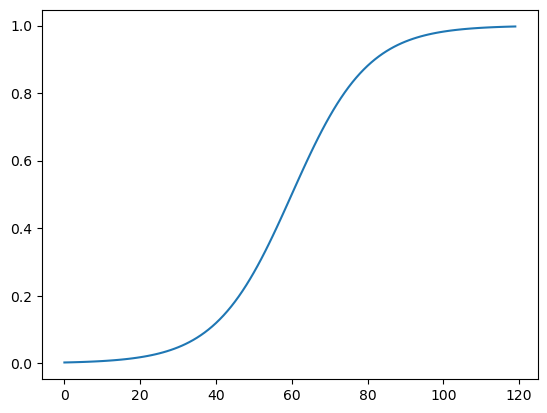

In [72]:
plt.plot(sequence)

In [73]:
# timeseries data
n_steps = 2

X = []
y = []

for i in range(len(sequence)-n_steps):
    X.append(sequence[i:i+n_steps])
    y.append(sequence[i+n_steps])

X = np.array(X)
y = np.array(y)

In [74]:
# Reshape
X.shape

(118, 2)

In [75]:
X = X.reshape((118, 2, 1))
X.shape

(118, 2, 1)

In [76]:
np.min(sequence), np.max(sequence)

(0.0024726231566347743, 0.9972680392369888)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [78]:
# Build the model

model = Sequential()

model.add(LSTM(units = 2, activation = 'relu', return_sequences=True, input_shape = (X.shape[1],1)))
model.add(LSTM(units = 4, activation = 'relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 2, 2)           │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 4)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
history = model.fit(X, y, epochs=40,  batch_size=2, validation_split=0.1)

Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0405 - val_loss: 0.0143
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0416 - val_loss: 0.0157
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455 - val_loss: 0.0207
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 - val_loss: 0.0183
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261 - val_loss: 0.0157
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0651 - val_loss: 0.0216
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0576 - val_loss: 0.0173
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0817 - val_loss: 0.0159
Epoch 9/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0643 - val_loss: 0.0140
Epoch 10/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477 - val_loss: 0.0222
Epoch 11/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0788 - val_loss: 0.0138
Epoch 12/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0641 - val_lo

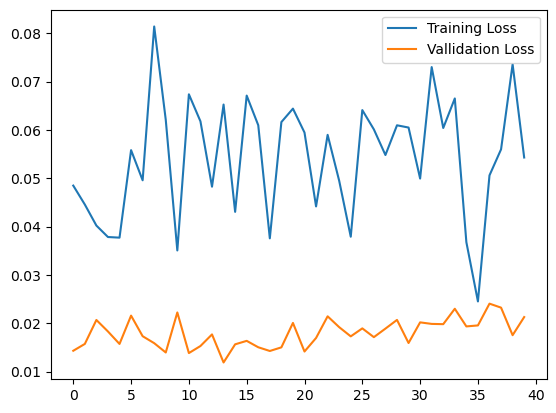

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Vallidation Loss')
plt.legend()
plt.show()

In [89]:
predictions=model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


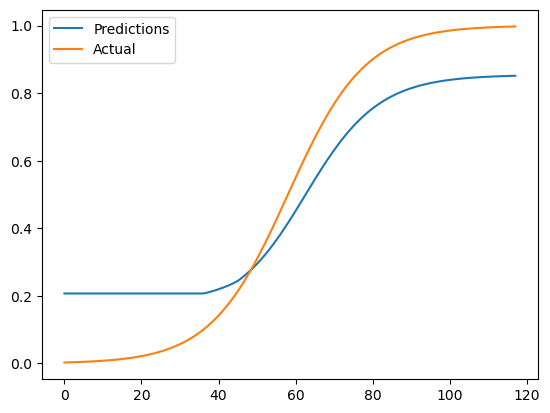

In [90]:
plt.plot(predictions, label='Predictions')
plt.plot(y, label= 'Actual')
plt.legend()
plt.show()